In [1]:
import json
import itertools
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.stats.mstats import spearmanr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from importlib import reload

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
MAX_SAMPLES = 5000

df = pd.read_csv('./datasets_with_labels/mnist.csv', header=None, nrows=MAX_SAMPLES)
df_data = df.iloc[:, :-1]
df_labels = df.iloc[:, -1]

mnist_full = pd.read_csv('./datasets_with_labels/mnist.csv', header=None)
df_data_full = mnist_full.iloc[:, :-1]
df_labels_full = mnist_full.iloc[:, -1]

In [3]:
mnist_tsne_embedding = pd.read_csv(
    './visualizations/data_embedded/mnist_tsne_embedding.csv', 
    header=None)
mnist_umap_embedding = pd.read_csv(
    './visualizations/data_embedded/mnist_umap_embedding.csv', 
    header=None)
mnist_pacmap_embedding = pd.read_csv(
    './visualizations/data_embedded/mnist_pacmap_embedding.csv', 
    header=None)
mnist_ivhd_euclidean_embedding = pd.read_csv(
    './ivhd_visualization_files/mnist_euclidean_visualization.txt', 
    header=None, 
    usecols=[0, 1])
mnist_ivhd_cosine_embedding = pd.read_csv(
    './ivhd_visualization_files/mnist_cosine_visualization.txt', 
    header=None,
    usecols=[0, 1])

In [4]:
def plot_2d_mnist_scatter(X, y, title, ax):
    plt.prism()
    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        ax.scatter(dim0, dim1, label=f"Digit {i}")
    ax.set_xticks(())
    ax.set_yticks(())
    plt.legend()
    plt.title(title)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  


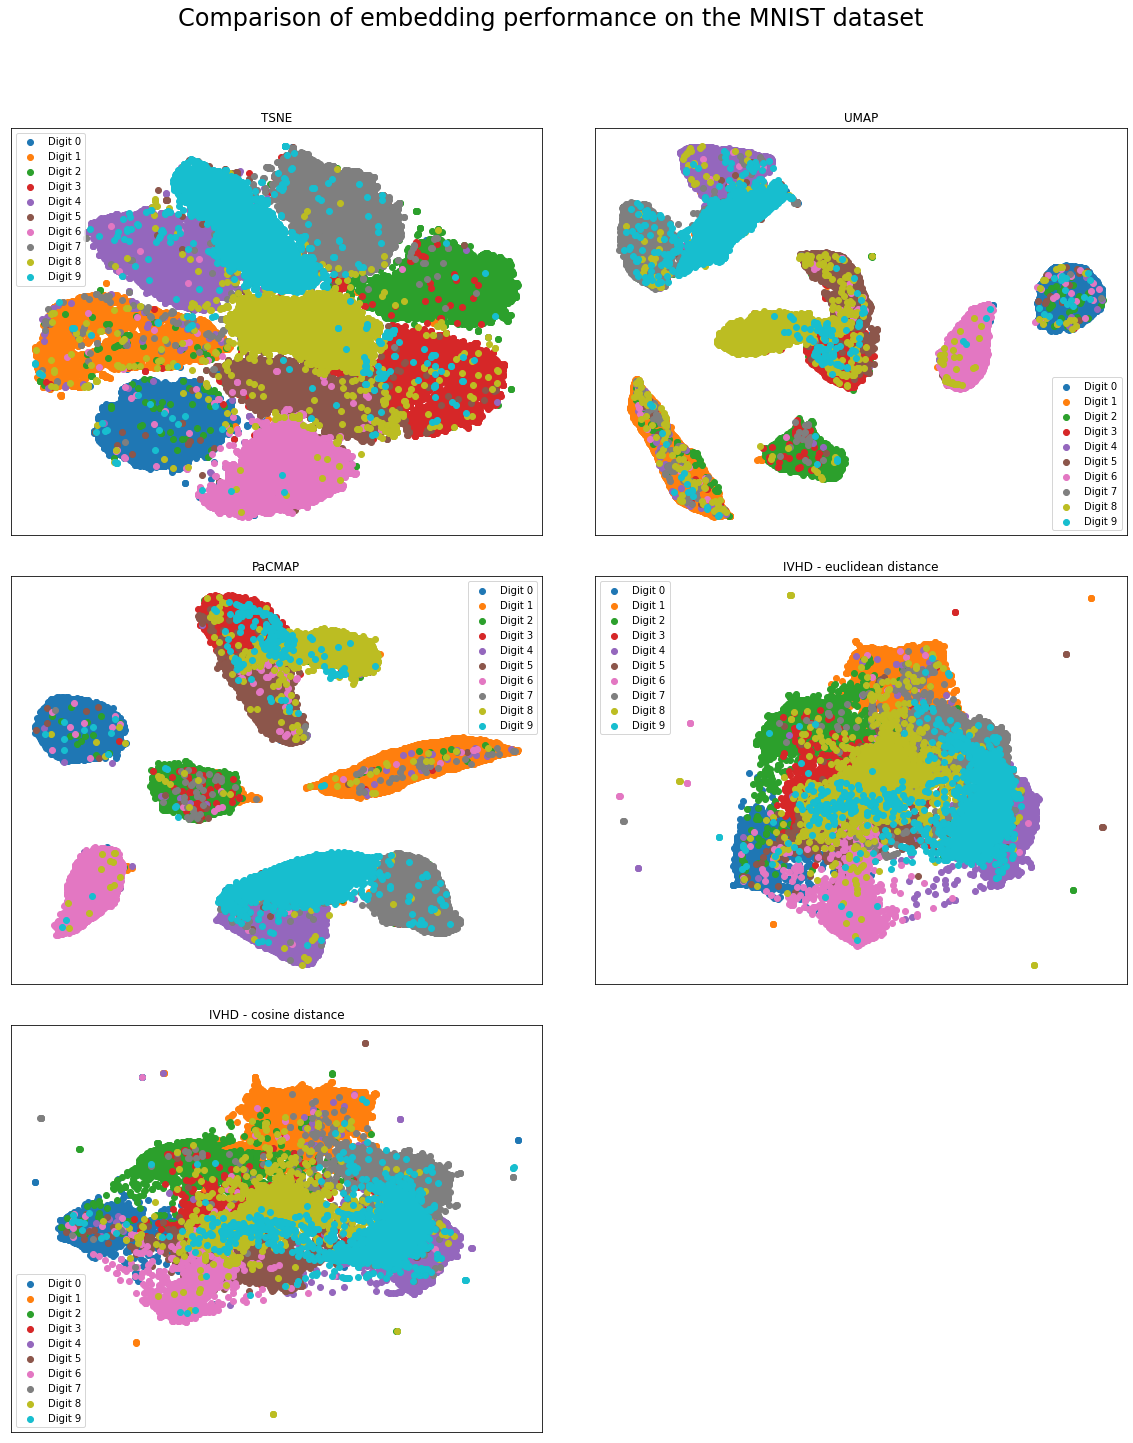

In [5]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
plot_2d_mnist_scatter(mnist_tsne_embedding.values, df_labels_full, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
plot_2d_mnist_scatter(mnist_umap_embedding.values, df_labels_full, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
plot_2d_mnist_scatter(mnist_pacmap_embedding.values, df_labels_full, 'PaCMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
plot_2d_mnist_scatter(mnist_ivhd_euclidean_embedding.values, df_labels_full, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
plot_2d_mnist_scatter(mnist_ivhd_cosine_embedding.values, df_labels_full, 'IVHD - cosine distance', ax20)

fig.suptitle('Comparison of embedding performance on the MNIST dataset', size=24, y=0.95)
fig.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.show()

In [4]:
# tsne_embedding = TSNE(n_components=2).fit_transform(df_data.values)
# df_tsne_embedding = pd.DataFrame(data=tsne_embedding)

random_embedding = np.random.rand(len(mnist_full), 2)
df_random_embedding = pd.DataFrame(data=random_embedding)

## Based on co-rank matrix

In [5]:
import metrics.co_rank_matrix_based_metric 
reload(metrics.co_rank_matrix_based_metric)

from metrics.co_rank_matrix_based_metric import CoRankMatrixBasedMetric

In [19]:
random_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    df_random_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000],
)

tsne_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    mnist_tsne_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000],
)

umap_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    mnist_umap_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

pacmap_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    mnist_pacmap_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

ivhd_euclidean_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    mnist_ivhd_euclidean_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

ivhd_cosine_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    mnist_ivhd_cosine_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

In [20]:
random_embedding_cr_metric_value = json.loads(random_embedding_cr_metric.calculate())

C:\Users\msmen\Desktop\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:117: RuntimeWarning: invalid value encountered in long_scalars
  return numerator / denominator
C:\Users\msmen\Desktop\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator


CoRankMatrixBasedMetric calculation took 68.19 seconds.


In [22]:
tsne_embedding_cr_metric_value = json.loads(tsne_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 67.49 seconds.


In [23]:
umap_embedding_cr_metric_value = json.loads(umap_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 68.67 seconds.


In [24]:
pacmap_embedding_cr_metric_value = json.loads(pacmap_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 73.23 seconds.


In [25]:
ivhd_euclidean_embedding_cr_metric_value = json.loads(ivhd_euclidean_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 67.23 seconds.


In [26]:
ivhd_cosine_embedding_cr_metric_value = json.loads(ivhd_cosine_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 70.40 seconds.


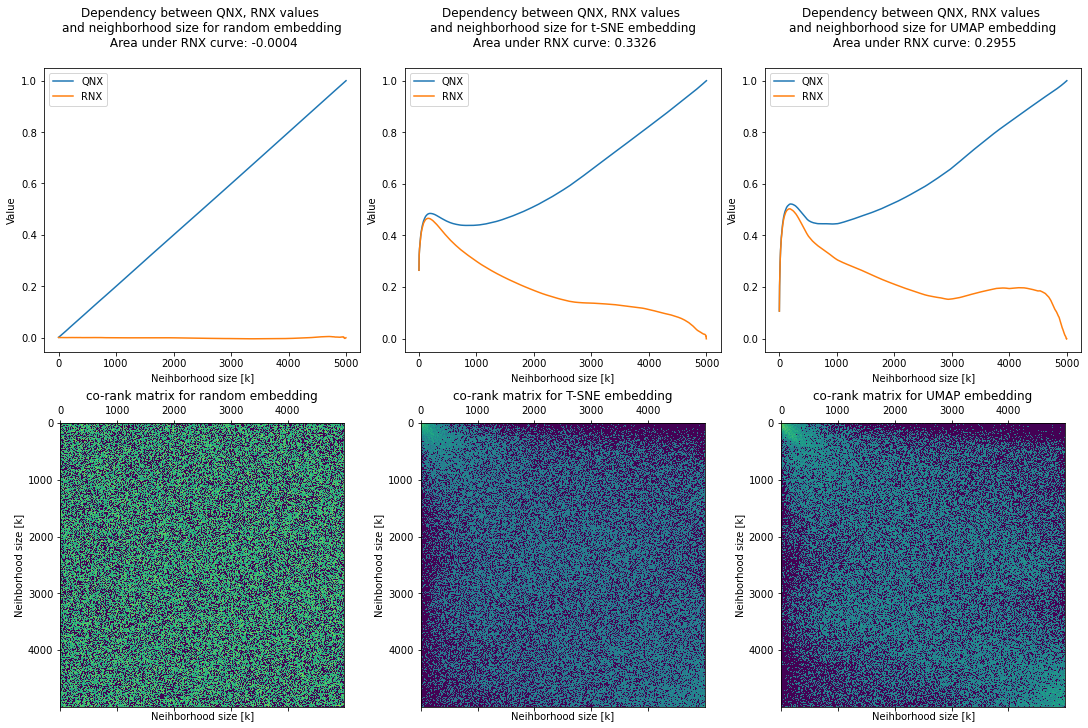

In [42]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

#=======================================================================================================

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for random embedding'
               f'\n Area under RNX curve: {random_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(random_embedding_cr_metric_value['QNX'], label='QNX')
ax00.plot(random_embedding_cr_metric_value['RNX'], label='RNX')
ax00.legend()


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for t-SNE embedding'
               f'\n Area under RNX curve: {tsne_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(tsne_embedding_cr_metric_value['QNX'], label='QNX')
ax01.plot(tsne_embedding_cr_metric_value['RNX'], label='RNX')
ax01.legend()

ax02 = fig.add_subplot(spec[0, 2])
ax02.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for UMAP embedding'
               f'\n Area under RNX curve: {umap_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax02.set_xlabel('Neihborhood size [k]')
ax02.set_ylabel('Value')
ax02.plot(umap_embedding_cr_metric_value['QNX'], label='QNX')
ax02.plot(umap_embedding_cr_metric_value['RNX'], label='RNX')
ax02.legend()

#=======================================================================================================

ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for random embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(random_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for T-SNE embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(tsne_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax12 = fig.add_subplot(spec[1, 2])
ax12.set_title("co-rank matrix for UMAP embedding")
ax12.set_xlabel('Neihborhood size [k]')
ax12.set_ylabel('Neihborhood size [k]')
ax12.matshow(np.log(umap_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

# fig.suptitle('[MNIST t-SNE embedding] \nVisualization of the metric results based on co-rank matrix', size=15)

In [43]:
fig.savefig("metrics_plots/MNIST-co-rank-matrix-part-1.png", transparent=True, facecolor='w')

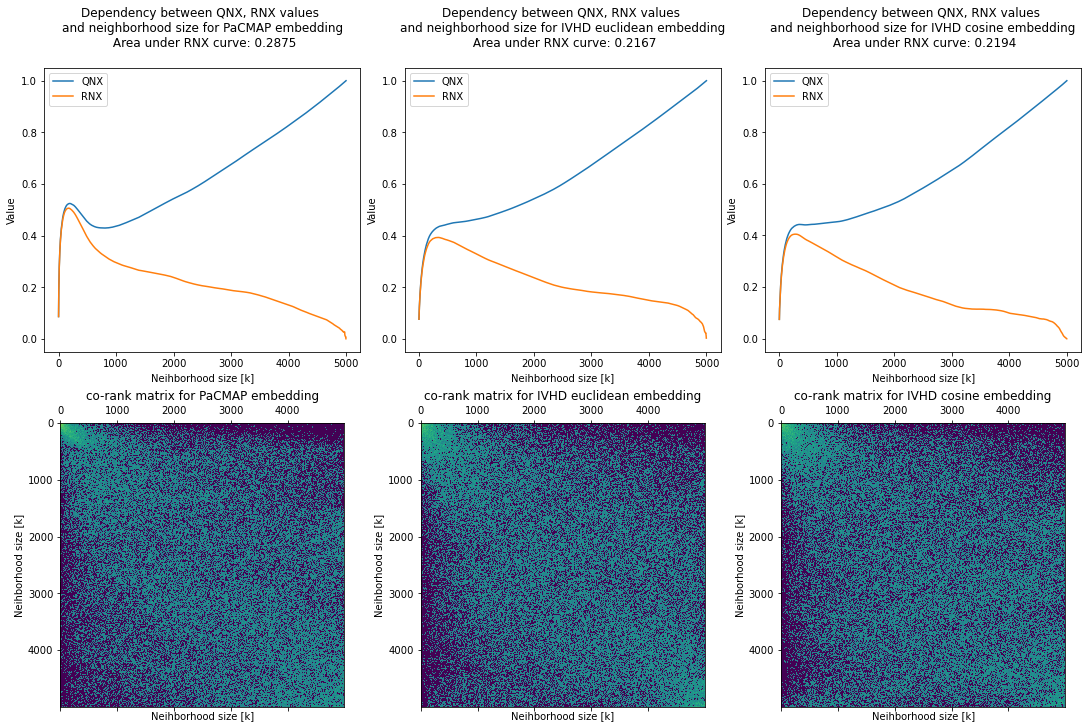

In [44]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

#=======================================================================================================

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for PaCMAP embedding'
               f'\n Area under RNX curve: {pacmap_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(pacmap_embedding_cr_metric_value['QNX'], label='QNX')
ax00.plot(pacmap_embedding_cr_metric_value['RNX'], label='RNX')
ax00.legend()


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for IVHD euclidean embedding'
               f'\n Area under RNX curve: {ivhd_euclidean_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(ivhd_euclidean_embedding_cr_metric_value['QNX'], label='QNX')
ax01.plot(ivhd_euclidean_embedding_cr_metric_value['RNX'], label='RNX')
ax01.legend()

ax02 = fig.add_subplot(spec[0, 2])
ax02.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for IVHD cosine embedding'
               f'\n Area under RNX curve: {ivhd_cosine_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax02.set_xlabel('Neihborhood size [k]')
ax02.set_ylabel('Value')
ax02.plot(ivhd_cosine_embedding_cr_metric_value['QNX'], label='QNX')
ax02.plot(ivhd_cosine_embedding_cr_metric_value['RNX'], label='RNX')
ax02.legend()

#=======================================================================================================

ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for PaCMAP embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(pacmap_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for IVHD euclidean embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(ivhd_euclidean_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax12 = fig.add_subplot(spec[1, 2])
ax12.set_title("co-rank matrix for IVHD cosine embedding")
ax12.set_xlabel('Neihborhood size [k]')
ax12.set_ylabel('Neihborhood size [k]')
ax12.matshow(np.log(ivhd_cosine_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

In [45]:
fig.savefig("metrics_plots/MNIST-co-rank-matrix-part-2.png", transparent=True, facecolor='w')

## Shepard's diagrams

In [12]:
from metrics.sheppards_diagram import ShepardDiagram

In [13]:
tsne_diagram = ShepardDiagram(df_data_full, mnist_tsne_embedding, df_labels_full)
umap_diagram = ShepardDiagram(df_data_full, mnist_umap_embedding, df_labels_full)
pacmap_diagram = ShepardDiagram(df_data_full, mnist_pacmap_embedding, df_labels_full)
ivhd_euclidean_diagram = ShepardDiagram(df_data_full, mnist_ivhd_euclidean_embedding, df_labels_full)
ivhd_cosine_diagram = ShepardDiagram(df_data_full, mnist_ivhd_cosine_embedding, df_labels_full)

In [14]:
tsne_diagram.calculate()
umap_diagram.calculate()
pacmap_diagram.calculate()
ivhd_euclidean_diagram.calculate()
ivhd_cosine_diagram.calculate()

ShepardDiagram calculation took 0.03 seconds.
ShepardDiagram calculation took 0.02 seconds.
ShepardDiagram calculation took 0.02 seconds.
ShepardDiagram calculation took 0.02 seconds.
ShepardDiagram calculation took 0.02 seconds.


In [15]:
def draw_diagram(x, y, title, ax):
    ax.scatter(x, y, alpha=0.5)
    ax.set_xlabel('Input distance')
    ax.set_ylabel('Output distance')
    plt.title(title)
    ax.grid()

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  


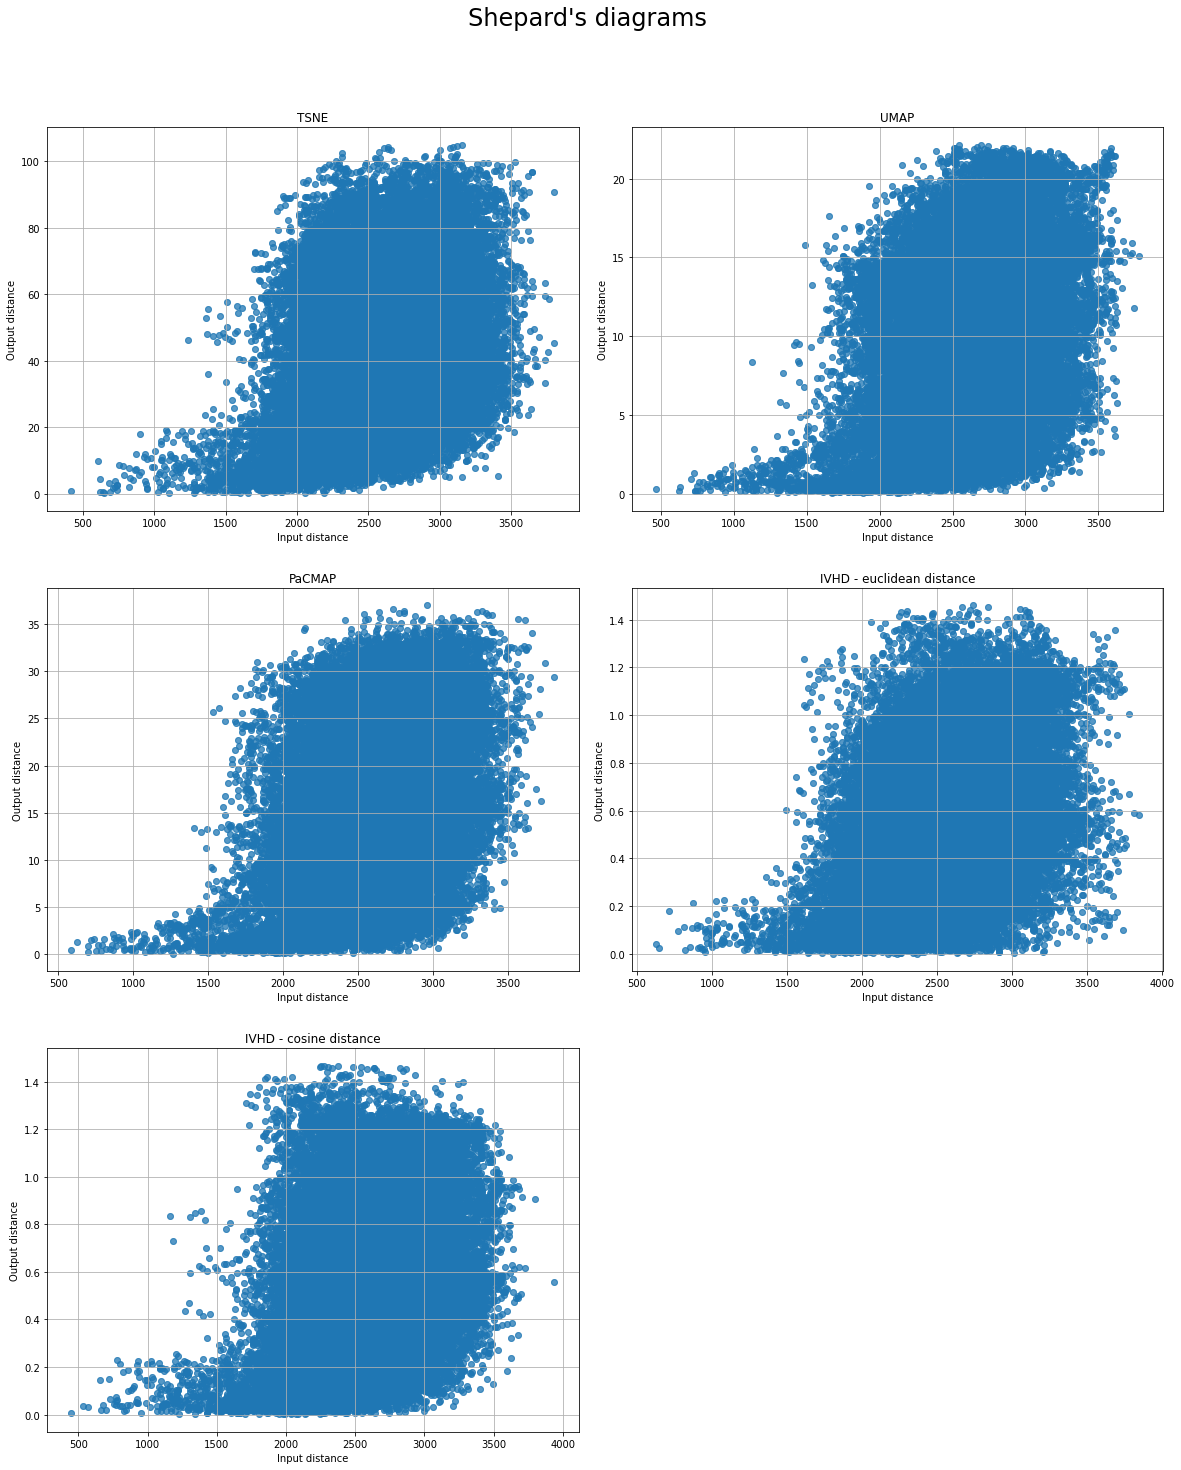

In [16]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
draw_diagram(tsne_diagram.original_distances, tsne_diagram.embedding_distances, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
draw_diagram(umap_diagram.original_distances, umap_diagram.embedding_distances, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
draw_diagram(pacmap_diagram.original_distances, pacmap_diagram.embedding_distances, 'PaCMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
draw_diagram(ivhd_euclidean_diagram.original_distances, ivhd_euclidean_diagram.embedding_distances, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
draw_diagram(ivhd_cosine_diagram.original_distances, ivhd_cosine_diagram.embedding_distances, 'IVHD - cosine distance', ax20)

fig.suptitle('Shepard\'s diagrams', size=24, y=0.95)
fig.subplots_adjust(wspace=0.1, hspace=0.2) 
plt.show()

## Thrustworthiness

In [46]:
from metrics.trustworthiness_based_metric import TrustworthinessBasedMetric

In [49]:
random_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], df_random_embedding.iloc[0:5000, :]
)

tsne_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], mnist_tsne_embedding.iloc[0:5000, :]
)

umap_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], mnist_umap_embedding.iloc[0:5000, :]
)

pacmap_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], mnist_pacmap_embedding.iloc[0:5000, :]
)

ivhd_euclidean_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], mnist_ivhd_euclidean_embedding.iloc[0:5000, :]
)

ivhd_cosine_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], mnist_ivhd_cosine_embedding.iloc[0:5000, :]
)

In [50]:
from pprint import pprint
pprint(random_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 40.05 seconds.
{'cosine': {'10': 0.499,
            '100': 0.506,
            '15': 0.5,
            '150': 0.508,
            '30': 0.5,
            '300': 1.145,
            '5': 0.499,
            '50': 0.502,
            '500': 0.928},
 'euclidean': {'10': 0.5,
               '100': 0.506,
               '15': 0.5,
               '150': 0.508,
               '30': 0.502,
               '300': 1.144,
               '5': 0.499,
               '50': 0.502,
               '500': 0.927}}


In [51]:
pprint(tsne_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 39.50 seconds.
{'cosine': {'10': 0.979,
            '100': 0.941,
            '15': 0.975,
            '150': 0.924,
            '30': 0.968,
            '300': 0.877,
            '5': 0.984,
            '50': 0.959,
            '500': 0.821},
 'euclidean': {'10': 0.974,
               '100': 0.927,
               '15': 0.97,
               '150': 0.908,
               '30': 0.959,
               '300': 0.858,
               '5': 0.98,
               '50': 0.948,
               '500': 0.803}}


In [52]:
pprint(umap_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 38.63 seconds.
{'cosine': {'10': 0.968,
            '100': 0.953,
            '15': 0.967,
            '150': 0.943,
            '30': 0.964,
            '300': 0.904,
            '5': 0.969,
            '50': 0.961,
            '500': 0.829},
 'euclidean': {'10': 0.957,
               '100': 0.936,
               '15': 0.955,
               '150': 0.924,
               '30': 0.952,
               '300': 0.879,
               '5': 0.959,
               '50': 0.947,
               '500': 0.802}}


In [53]:
pprint(pacmap_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 38.70 seconds.
{'cosine': {'10': 0.966,
            '100': 0.953,
            '15': 0.965,
            '150': 0.944,
            '30': 0.963,
            '300': 0.905,
            '5': 0.967,
            '50': 0.96,
            '500': 0.827},
 'euclidean': {'10': 0.956,
               '100': 0.936,
               '15': 0.954,
               '150': 0.924,
               '30': 0.951,
               '300': 0.879,
               '5': 0.957,
               '50': 0.946,
               '500': 0.802}}


In [54]:
pprint(ivhd_euclidean_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 38.86 seconds.
{'cosine': {'10': 0.881,
            '100': 0.871,
            '15': 0.879,
            '150': 0.865,
            '30': 0.878,
            '300': 0.845,
            '5': 0.881,
            '50': 0.875,
            '500': 0.81},
 'euclidean': {'10': 0.873,
               '100': 0.861,
               '15': 0.871,
               '150': 0.855,
               '30': 0.869,
               '300': 0.831,
               '5': 0.875,
               '50': 0.867,
               '500': 1.201}}


In [55]:
pprint(ivhd_cosine_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 39.04 seconds.
{'cosine': {'10': 0.904,
            '100': 0.894,
            '15': 0.902,
            '150': 0.887,
            '30': 0.901,
            '300': 0.857,
            '5': 0.907,
            '50': 0.899,
            '500': 0.814},
 'euclidean': {'10': 0.889,
               '100': 0.877,
               '15': 0.887,
               '150': 0.868,
               '30': 0.886,
               '300': 0.839,
               '5': 0.893,
               '50': 0.883,
               '500': 1.201}}


## Distance Matrix based

In [56]:
from metrics.distance_matrix_based_metric import DistanceMatrixBasedMetric

In [66]:
tsne_embedding_dm_metric = DistanceMatrixBasedMetric(
    mnist_tsne_embedding, df_labels_full
)

umap_embedding_dm_metric = DistanceMatrixBasedMetric(
    mnist_umap_embedding, df_labels_full
)

pacmap_embedding_dm_metric = DistanceMatrixBasedMetric(
    mnist_pacmap_embedding, df_labels_full
)

ivhd_euclidean_embedding_dm_metric = DistanceMatrixBasedMetric(
    mnist_ivhd_euclidean_embedding, df_labels_full
)

ivhd_cosine_embedding_dm_metric = DistanceMatrixBasedMetric(
    mnist_ivhd_cosine_embedding, df_labels_full
)

In [65]:
tsne_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 51.19 seconds.


0.34591601728629245

In [67]:
umap_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 50.32 seconds.


0.16830739696364438

In [68]:
pacmap_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 51.18 seconds.


0.22950670171507645

In [69]:
ivhd_euclidean_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 51.94 seconds.


0.21188113765025

In [70]:
ivhd_cosine_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 49.29 seconds.


0.20052621718231112

## Distance Matrix and KMeans based

In [73]:
from metrics.distance_matrix_and_kmeans_based_metric import DistanceMatrixAndKMeansBasedMetric

In [74]:
tsne_embedding_dmkmenas_metric = DistanceMatrixAndKMeansBasedMetric(
    mnist_tsne_embedding, df_labels_full
)

umap_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    mnist_umap_embedding, df_labels_full
)

pacmap_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    mnist_pacmap_embedding, df_labels_full
)

ivhd_euclidean_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    mnist_ivhd_euclidean_embedding, df_labels_full
)

ivhd_cosine_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    mnist_ivhd_cosine_embedding, df_labels_full
)

In [75]:
tsne_embedding_dmkmenas_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 15.70 seconds.


0.33062477060830603

In [76]:
umap_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 13.57 seconds.


0.20344850378223417

In [77]:
pacmap_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 14.32 seconds.


0.21233419837665854

In [78]:
ivhd_euclidean_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 13.97 seconds.


0.24703884122879566

In [79]:
ivhd_cosine_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 13.77 seconds.


0.21917830945162997

## KNN gain and DR quality

In [81]:
from metrics.knn_gain_and_dr_quality import LocalMetric

local_metrics_mnist = LocalMetric()

In [83]:
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_tsne_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='tsne')

Calculating d_hd
tsne


In [84]:
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_umap_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='umap')

Calculating d_hd
umap


In [85]:
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_pacmap_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='pacmap')

Calculating d_hd
pacmap


In [86]:
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_ivhd_euclidean_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='ivhd euclidean')

Calculating d_hd
ivhd euclidean


In [87]:
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_ivhd_cosine_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='ivhd cosine')

Calculating d_hd
ivhd cosine


In [ ]:
from importlib import reload
import metrics.knn_gain_and_dr_quality
reload(metrics.knn_gain_and_dr_quality)
from metrics.knn_gain_and_dr_quality import LocalMetric

Finished.


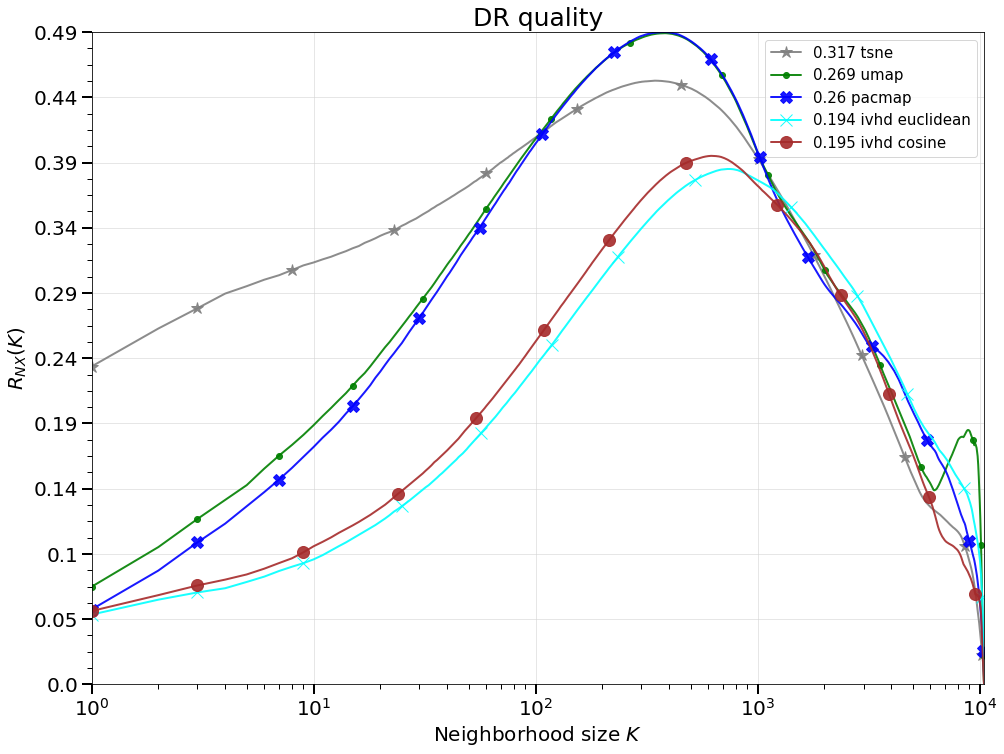

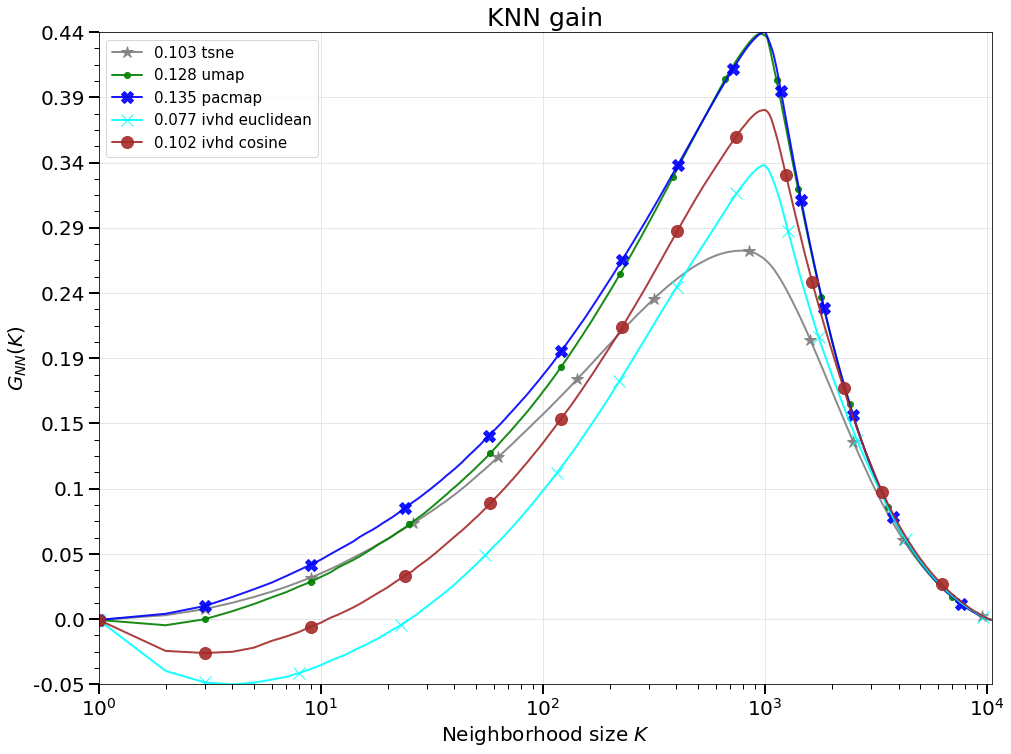

In [93]:
local_metrics_mnist.visualize()

## Spearman correlation based

In [101]:
import metrics.spearman_correlation_based_metric
reload(metrics.spearman_correlation_based_metric)
from metrics.spearman_correlation_based_metric import SpearmanCorrelationBasedMetric

In [102]:
tsne_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    mnist_tsne_embedding.iloc[0:5000, :]
)

In [103]:
tsne_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 1285.85 seconds.


0.6661483254438892

In [104]:
umap_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    mnist_umap_embedding.iloc[0:5000, :]
)

pacmap_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    mnist_pacmap_embedding.iloc[0:5000, :]
)

ivhd_euclidean_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    mnist_ivhd_euclidean_embedding.iloc[0:5000, :]
)

ivhd_cosine_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    mnist_ivhd_cosine_embedding.iloc[0:5000, :]
)

In [105]:
umap_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 1260.27 seconds.


0.6829967233176052

In [106]:
pacmap_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 1997.31 seconds.


0.6998819034051807

In [107]:
ivhd_euclidean_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 1468.01 seconds.


0.49123184131758457

In [108]:
ivhd_cosine_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 1600.56 seconds.


0.5279307649949815